In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA  # Reduce dimensions for visualization
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, silhouette_score
)
data=pd.read_csv('StudentPerformanceFactors.csv')
df=data

print(data.info()) #knowing the data info about attribtues

display(data.head())

missing_summary = data.isnull().sum()

# Filter to show only columns with missing values
columns_with_missing = missing_summary[missing_summary > 0]
print("Columns with missing values and their counts:")
print(columns_with_missing)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Columns with missing values and their counts:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [3]:
# Replace missing values in specified columns with their mode
#all three columns with missing values were categorical and among 6607 records and 20 columns less than 100 missing values in each of three columns
# the missing values quantity were negligible therefore the mode was used to replace as it is almost insignificant
columns_to_fill = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']


for column in columns_to_fill:
    # Calculate the mode for the column
    mode_value = data[column].mode()[0]  # mode() returns a series, take the first value
    # Fill missing values with the mode
    data[column].fillna(mode_value, inplace=True)

print("Missing values replaced with mode in specified columns.")

missing_summary = data.isnull().sum()  #checking if there is any other missing values

# Filter to show only columns with missing values
columns_with_missing = missing_summary[missing_summary > 0]
print("Columns with missing values and their counts:")
print(columns_with_missing)

data.drop_duplicates(inplace=True)  #remove duplicate records from the data but we see no duplicate record present

print(data.info())


Missing values replaced with mode in specified columns.
Columns with missing values and their counts:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 

C:\Users\dkush\AppData\Local\Temp\ipykernel_4292\2015855670.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


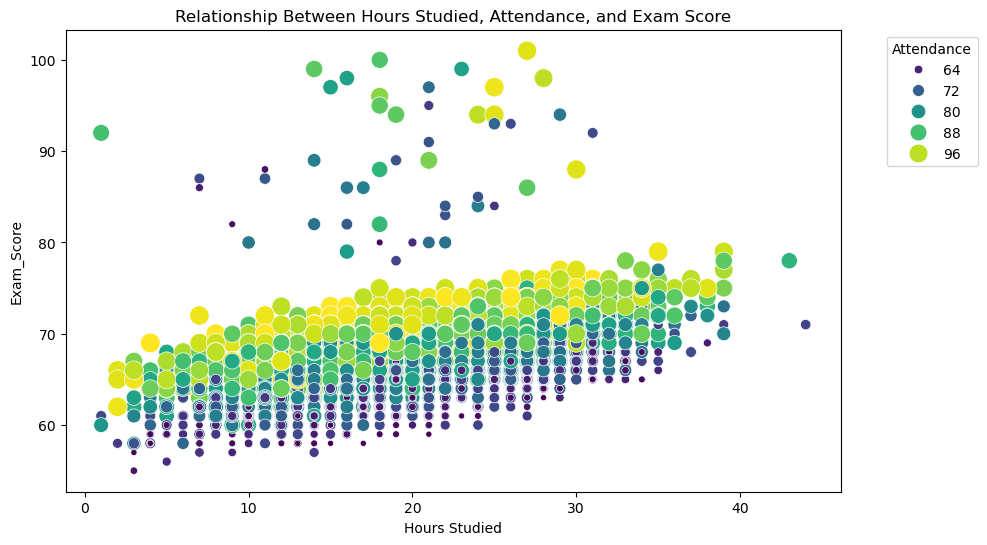

In [4]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Attendance', size='Attendance',
                data=df, palette='viridis', sizes=(20, 200))  # Create scatter plot
plt.title('Relationship Between Hours Studied, Attendance, and Exam Score')  # Title of the plot
plt.xlabel('Hours Studied')  # X-axis label
plt.ylabel('Exam_Score')  # Y-axis label
plt.legend(title='Attendance', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()  # Display the plot



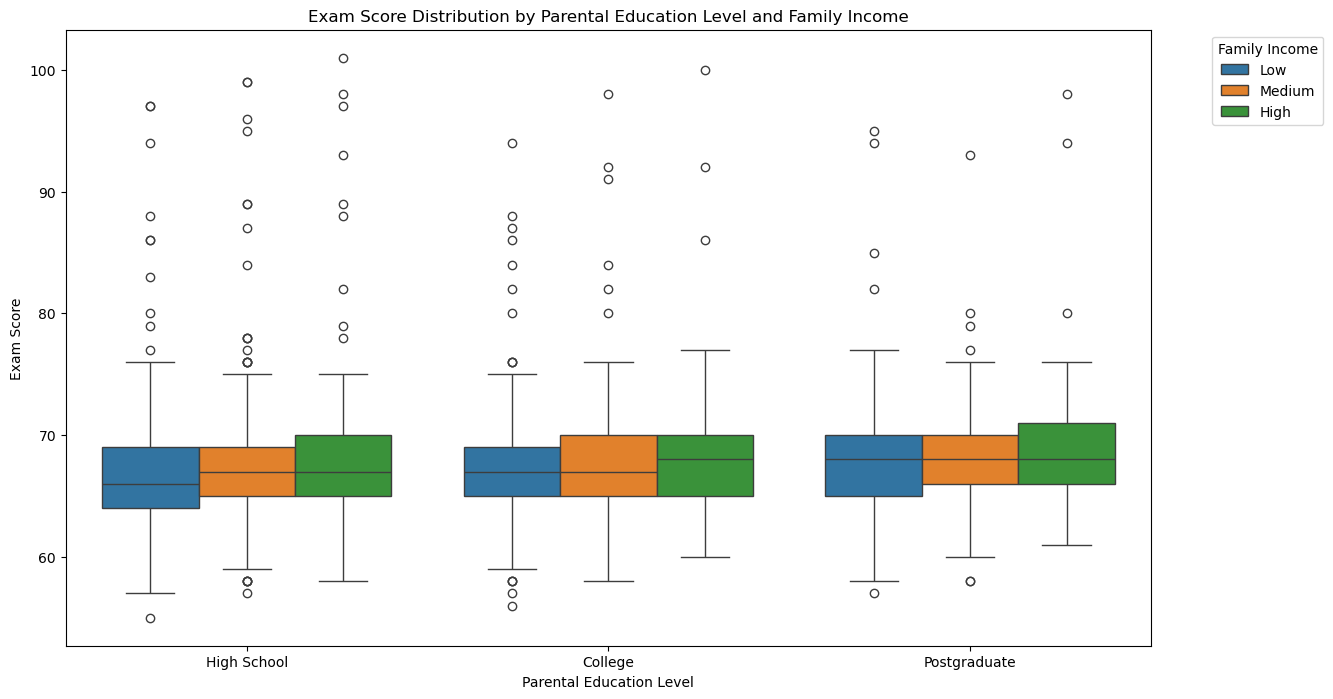

In [5]:
plt.figure(figsize=(14, 8))  # Set the figure size to 14 inches wide and 8 inches tall for better readability
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', hue='Family_Income', data=data)  # Create a box plot
plt.title('Exam Score Distribution by Parental Education Level and Family Income')  # Add a title to the plot
plt.xlabel('Parental Education Level')  # Label the x-axis to represent 'Parental Education Level'
plt.ylabel('Exam Score')  # Label the y-axis to represent 'Exam Score'
plt.legend(title='Family Income', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot area
plt.show()  # Display the plot


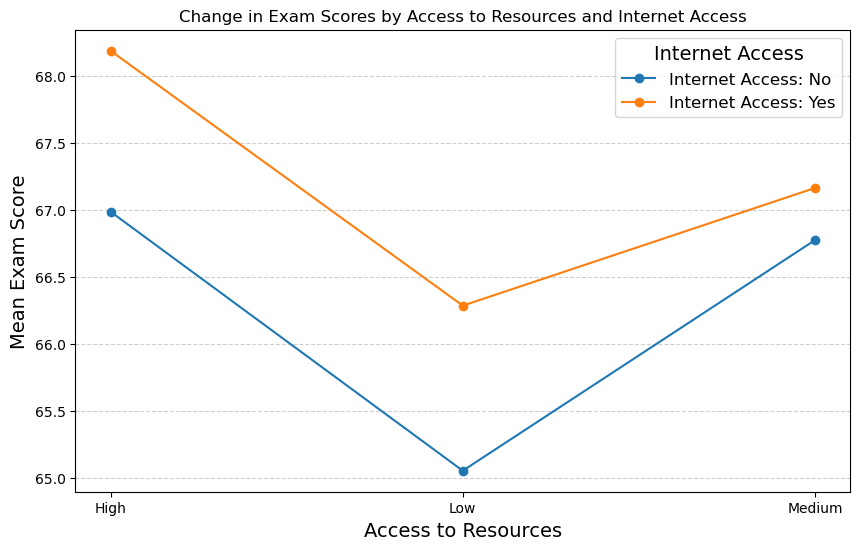

In [6]:
# Group data by 'Access_to_Resources' and 'Internet_Access', then calculate mean 'Exam_Score'
slope_data = data.groupby(['Access_to_Resources', 'Internet_Access'])['Exam_Score'].mean().unstack()

# Create the plot with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Plot each 'Internet_Access' level as a separate line with circular markers
for column in slope_data.columns:
    plt.plot(slope_data.index, slope_data[column], marker='o', label=f'Internet Access: {column}')

# Set plot title and axis labels with appropriate font sizes
plt.title('Change in Exam Scores by Access to Resources and Internet Access')
plt.xlabel('Access to Resources', fontsize=14)
plt.ylabel('Mean Exam Score', fontsize=14)

# Add legend and grid lines
plt.legend(title='Internet Access', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.show()


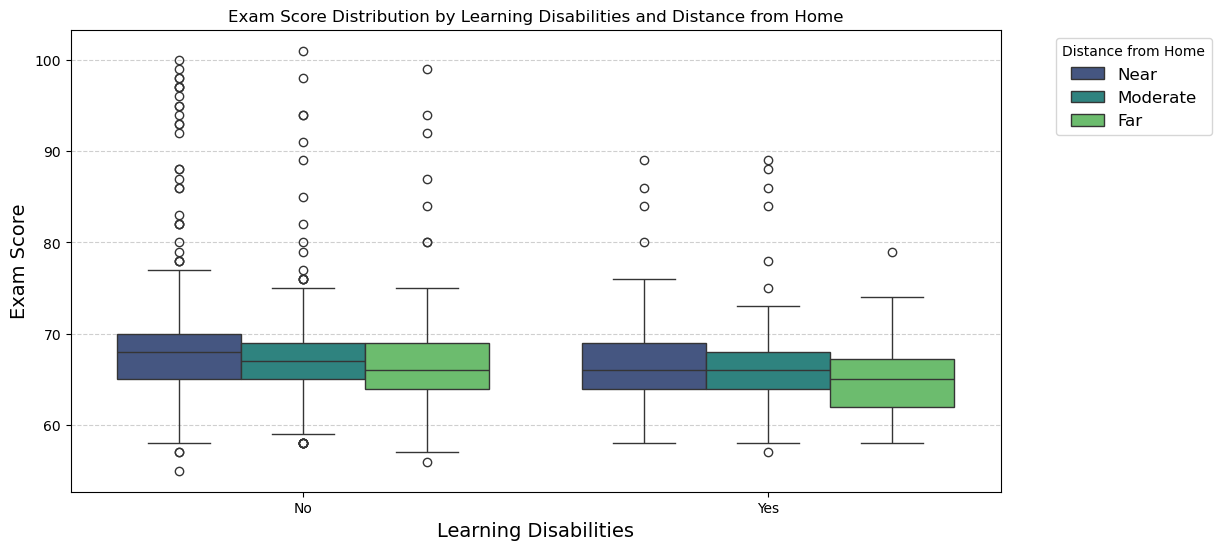

C:\Users\dkush\AppData\Local\Temp\ipykernel_4292\2955465865.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Distance_from_Home', y='Exam_Score', hue='School_Type', data=data, ci=None)


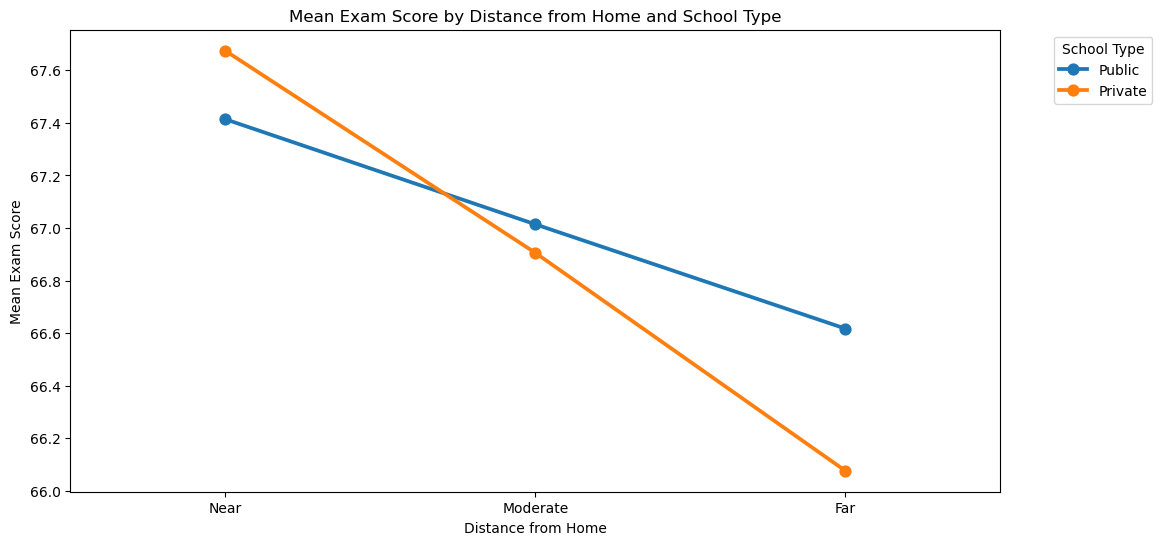

In [7]:
# Create a boxplot to visualize the distribution of Exam Scores by Learning Disabilities and Distance from Home
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Learning_Disabilities',  # X-axis: 'Learning_Disabilities' (categorical variable)
    y='Exam_Score',  # Y-axis: 'Exam_Score' (numerical variable)
    hue='Distance_from_Home',  # Color the boxes based on 'Distance_from_Home' (categorical)
    data=data,  # Data source
    palette='viridis'  # Color palette for aesthetic purposes
)
# Add a title and axis labels with specific font sizes
plt.title('Exam Score Distribution by Learning Disabilities and Distance from Home')
plt.xlabel('Learning Disabilities', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
# Adjust the legend to display outside the plot
plt.legend(title='Distance from Home', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
# Add gridlines along the Y-axis to make the plot clearer
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show the boxplot
plt.show()

# Create a pointplot to visualize the mean Exam Score by Distance from Home and School Type
plt.figure(figsize=(12, 6))

# Pointplot to show mean exam scores by 'Distance_from_Home' and 'School_Type' categories
sns.pointplot(x='Distance_from_Home', y='Exam_Score', hue='School_Type', data=data, ci=None)
# Add a title and axis labels
plt.title('Mean Exam Score by Distance from Home and School Type')
plt.xlabel('Distance from Home')
plt.ylabel('Mean Exam Score')
# Adjust the legend to display outside the plot
plt.legend(title='School Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the pointplot
plt.show()


In [7]:
def prepare_data(df, target_column):
    """
    Prepares data by encoding categorical variables and scaling numeric variables.
    Handles large datasets efficiently.
    """
    data = df.copy()
    encoders = {}
    
    # Identify categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    
     # Loop over categorical columns and apply Label Encoding to convert them to numeric values
    for column in categorical_columns:
        le = LabelEncoder()  # Initialize LabelEncoder
        data[column] = le.fit_transform(data[column])  # Apply encoding to each categorical column
        encoders[column] = le  # Store the encoder for later use (if needed for inverse transformation)
    
    
    # Separate features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    
  # Scale the numerical features using StandardScaler to standardize the values
    scaler = StandardScaler()  # Initialize StandardScaler to standardize features
    X_scaled = scaler.fit_transform(X)  # Apply scaling to the features
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Convert the scaled data back into a DataFrame
    
    
    return X_scaled_df, y, encoders, scaler

# Prepare the data
target_column = "Exam_Score"  # Specify the correct target column
X, y, encoders, scaler = prepare_data(df, target_column)

# For binary classification (e.g., pass/fail)
y_binary = (y > y.median()).astype(int)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Memory check for large datasets
# Print the shapes of the training and testing datasets to verify the split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (5285, 19)
Test data shape: (1322, 19)


In [8]:
def perform_decision_tree_classification(X_train, X_test, y_train, y_test, X_full, y_full):
    """
    Train and evaluate a Decision Tree Classifier with k-Fold Cross-Validation.
    """
    # Initialize the Decision Tree Classifier with a random state for reproducibility
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train) # Train the model on the training data (X_train, y_train)
    
    # Predictions and performance metrics
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # k-Fold Cross-Validation
    # Initialize k-fold cross-validation with 10 folds
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(dt_classifier, X_full, y_full, cv=kfold, scoring="accuracy")
    
    return {
        "model": dt_classifier,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
        "cv_scores": cv_scores
    }

# Evaluate Decision Tree
dt_results = perform_decision_tree_classification(X_train, X_test, y_train, y_test, X, y_binary)

# Print results
print("\nDecision Tree Results:")
print(f"Accuracy: {dt_results['accuracy']:.3f}")
print(f"Precision: {dt_results['precision']:.3f}")
print(f"Recall: {dt_results['recall']:.3f}")
print(f"F1 Score: {dt_results['f1_score']:.3f}")
print(f"Cross-Validation Mean Accuracy: {dt_results['cv_mean']:.3f}")
print(f"Cross-Validation Std Dev: {dt_results['cv_std']:.3f}")



Decision Tree Results:
Accuracy: 0.815
Precision: 0.796
Recall: 0.809
F1 Score: 0.803
Cross-Validation Mean Accuracy: 0.815
Cross-Validation Std Dev: 0.014


In [9]:
def perform_linear_regression_classification(X_train, X_test, y_train, y_test, X_full, y_full):
    """
    Train and evaluate a Logistic Regression model with k-Fold Cross-Validation.
    """

    # Initialize the Logistic Regression model with a fixed random state for reproducibility
    lr_classifier = LogisticRegression(random_state=42, solver='liblinear')
    lr_classifier.fit(X_train, y_train) # Train the model on the training data (X_train, y_train)
    
    # Predictions and performance metrics
    y_pred = lr_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # k-Fold Cross-Validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42) # Initialize k-fold cross-validation with 10 folds
    # Perform cross-validation on the full dataset (X_full, y_full)
    cv_scores = cross_val_score(lr_classifier, X_full, y_full, cv=kfold, scoring="accuracy") 
    
    
    return {
        "model": lr_classifier,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
        "cv_scores": cv_scores
    }

# Evaluate Logistic Regression
lr_results = perform_linear_regression_classification(X_train, X_test, y_train, y_test, X, y_binary)

# Print results
print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_results['accuracy']:.3f}")
print(f"Precision: {lr_results['precision']:.3f}")
print(f"Recall: {lr_results['recall']:.3f}")
print(f"F1 Score: {lr_results['f1_score']:.3f}")
print(f"Cross-Validation Mean Accuracy: {lr_results['cv_mean']:.3f}")
print(f"Cross-Validation Std Dev: {lr_results['cv_std']:.3f}")


Logistic Regression Results:
Accuracy: 0.893
Precision: 0.889
Recall: 0.878
F1 Score: 0.883
Cross-Validation Mean Accuracy: 0.892
Cross-Validation Std Dev: 0.011


In [18]:
# Assuming 'data' is your dataframe and you need to encode categorical variables
encoded_data = pd.get_dummies(data)

# Use Apriori to find frequent itemsets
frequent_itemsets = apriori(encoded_data, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules)

d:\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 23